# Model Training (No additional features)

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
import numpy as np 

df = pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/BTC-AUD?period1=1410912000&period2=1674259200&interval=1d&events=history&includeAdjustedClose=true")
df = df.dropna()


X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)




# Data Statistics

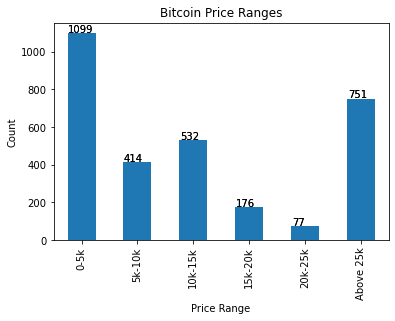

In [2]:
import matplotlib.pyplot as plt
ranges = [0, 5000, 10000, 15000, 20000, 25000, float('inf')]

df['Price Range'] = pd.cut(df['Close'], bins=ranges, labels=['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k','Above 25k'])



df['Price Range'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Bitcoin Price Ranges')
ax = df['Price Range'].value_counts().sort_index().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()
plt.show()

In [3]:
for i, j in zip(y_test,y_pred):
    print("Actual price {}".format(i)+"            "+"Predicted price {}".format(j))
    print("Delta: {}".format(abs(i-j)))
    print("\n----------------\n")

Actual price 391.121948            Predicted price 395.9100145471129
Delta: 4.788066547112919

----------------

Actual price 81690.140625            Predicted price 81660.32789217381
Delta: 29.812732826190768

----------------

Actual price 25354.851563            Predicted price 25482.415571908023
Delta: 127.56400890802252

----------------

Actual price 31111.251953            Predicted price 30545.06902233638
Delta: 566.1829306636173

----------------

Actual price 299.107025            Predicted price 307.6985408278641
Delta: 8.5915158278641

----------------

Actual price 60226.113281            Predicted price 60805.679807223074
Delta: 579.5665262230759

----------------

Actual price 2006.584961            Predicted price 2007.4785329693884
Delta: 0.8935719693884039

----------------

Actual price 13356.169922            Predicted price 13333.147940050918
Delta: 23.021981949081237

----------------

Actual price 65957.914063            Predicted price 63778.283622783594
Delta: 

# Model Accuracy using Mean Absolute Error (MAE) 

Mean Absolute Error (MAE) is a measure of how close the predicted values are to the true values. It is a commonly used metric to evaluate the performance of regression models. Here we calculate the MAE without adding any additional features to the model

In [4]:
from sklearn.metrics import mean_squared_error
print(mean_absolute_error(y_test, y_pred))

199.4714509390571


# Here we retrain the model but we add the delta between two consecutive days as an additional feature and recalulate the MAE leading to a lower MAE (more accurate)

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
import numpy as np 

df = pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/BTC-AUD?period1=1410912000&period2=1674259200&interval=1d&events=history&includeAdjustedClose=true")
df = df.dropna()

delta = np.append(0, np.diff(df['Close']))

# Add delta as an additional feature to the dataframe
df['Delta'] = delta

X = df[['Open', 'High', 'Low', 'Volume','Delta']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(mean_absolute_error(y_test, y_pred))

15.866627735748768


In [6]:
for i, j in zip(y_test,y_pred):
    print("Actual price {}".format(i)+"            "+"Predicted price {}".format(j))
    print("Delta: {}".format(abs(i-j)))
    print("\n----------------\n")

Actual price 345.939697            Predicted price 347.0635681719877
Delta: 1.1238711719876733

----------------

Actual price 53096.734375            Predicted price 53073.830036942294
Delta: 22.9043380577059

----------------

Actual price 11846.813477            Predicted price 11849.286057048645
Delta: 2.472580048644886

----------------

Actual price 50666.167969            Predicted price 50632.92859623287
Delta: 33.23937276712968

----------------

Actual price 57494.703125            Predicted price 57495.09555515423
Delta: 0.39243015422835015

----------------

Actual price 15785.856445            Predicted price 15781.849160112275
Delta: 4.007284887724381

----------------

Actual price 52978.136719            Predicted price 52962.487566149386
Delta: 15.649152850615792

----------------

Actual price 10630.277344            Predicted price 10631.551802304484
Delta: 1.274458304484142

----------------

Actual price 11694.981445            Predicted price 11720.624662510958
De